In [50]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn import svm

import patsy as ps
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.cross_validation import LeaveOneLabelOut
from sklearn.cross_validation import LeavePLabelOut

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.cross_validation import StratifiedKFold

# diabetes

In [46]:
#load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
X = np.array(df)
Y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df1 = pd.DataFrame(df)
df1.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
#arrumando a variável sexo
def arruma(age):
    if age < 0:
        return '0'
    else:
        return '1'
df1['sex'] = df1['sex'].apply(arruma)

In [5]:
# criando as bases de treinamento e teste
# fixando a semente para não alterar a amostra cada vez que rodar o programa
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=1234)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
#ajustando modelo linear
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

p_train = lm.predict(X_train)
p_test = lm.predict(X_test)

model.coef_

array([  -43.45526217,   -26.74332729,   528.97893541,   346.50018232,
       -1032.32970269,   661.5777617 ,   241.08637357,   240.52992036,
         798.26318387,   123.16933708])



 ---Train---


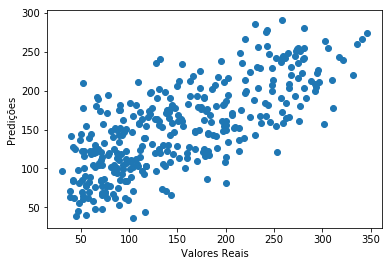



 ---Test---


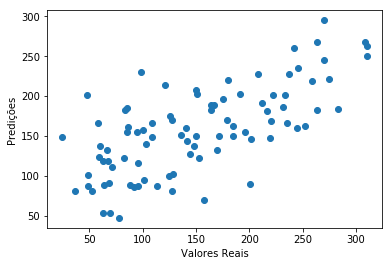

In [9]:
#plotando o modelo ajustado
print ("\n\n ---Train---")
plt.scatter(y_train, p_train) # real x previsto train
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()
print ("\n\n ---Test---")
plt.scatter(y_test, p_test) # real x previsto test
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [10]:
#R^2 do modelo
print ("R^2 train:", model.score( X_train, y_train))
print ("R^2 test:", model.score( X_test, y_test))

R^2 train: 0.527130975259
R^2 test: 0.462633650798


# why do cross-validation?

In [ ]:
a divisão em treinamento/teste tem seus perigos: 
e se a divisão não for aleatória? 
e se um subconjunto dos dados tiver apenas pessoas de um determinado estado 
ou funcionários com um certo nível de renda, mas não outros níveis de renda, 
apenas mulheres ou apenas pessoas com certa idade? 
isso resultará em overfitting, mesmo que tentemos evitá-lo! 
é aqui que entra a validação cruzada.

In [47]:
cv_results =  cross_val_score(model, df, Y, cv=4)
np.mean(cv_results)

0.48460844720078861

# k-fold cross validation

In [ ]:
* split your entire dataset into k folds.
* for each k folds in your dataset, build your model on k – 1 folds of the data set.
* test the model to check the effectiveness for kth fold.
* record error you see on each of the predictions.
* the average of k errors is the cross-validation error and the performance metric of the model.

In [12]:
X1 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) 
y1 = np.array([1, 2, 3, 4]) 
kf = KFold(n_splits=2,random_state=1234) 
kf.get_n_splits(X1) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=2, random_state=1234, shuffle=False)


In [13]:
for train_index, test_index in kf.split(X1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [21]:
#perform 6-fold cross validation'
scores1 = cross_val_score(model, df, Y, cv=6)
print ("Cross-validated 6-fold scores: ", scores1)
print("Average 6-Fold CV Score: {}".format(np.mean(scores1)))

Cross-validated 6-fold scores:  [ 0.4554861   0.46138572  0.40094084  0.55220736  0.43942775  0.56923406]
Average 6-Fold CV Score: 0.4797803047530254


In [ ]:
#Como você pode ver, a última dobra melhorou a pontuação do modelo original de 0.463 para 0,569. 

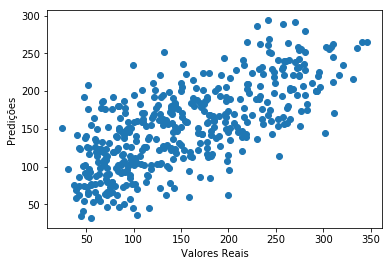

In [22]:
# Make cross validated predictions
predictions1 = cross_val_predict(model, df, Y, cv=6)
plt.scatter(Y, predictions1)
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [ ]:
#Este gráfico é muito diferente do original. 
#Temos seis vezes mais pontos do que o gráfico original porque usei cv = 6. 
#Finalmente, vamos verificar a classificação R² do modelo 
#R² indica a proporção da variância na variável dependente que é previsível a partir da(s) variável(is) independente(s). 
#Basicamente, quão preciso é o nosso modelo

In [23]:
accuracy1 = metrics.r2_score(Y, predictions1)
print ("Cross-Predicted 6-fold  R^2:", accuracy1)

Cross-Predicted 6-fold  R^2: 0.490806583864


# Leave One Out Cross Validation (LOO)

In [24]:
X2 = np.array([[1, 2], [3, 4]])
y2 = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X2,y2)

2

In [25]:
for train_index, test_index in loo.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index)
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    print(X2_train, X2_test, y2_train, y2_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [26]:
#um exemplo com maior número de linhas na tabela
X2 = np.array([[1, 2], [3, 4],[5, 6], [7, 8],[9, 0]])
y2 = np.array([10,11,12,13,14])
loo = LeaveOneOut()
loo.get_n_splits(X2)

for train_index, test_index in loo.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index)
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    print(X2_train, X2_test, y2_train, y2_test)

TRAIN: [1 2 3 4] TEST: [0]
[[3 4]
 [5 6]
 [7 8]
 [9 0]] [[1 2]] [11 12 13 14] [10]
TRAIN: [0 2 3 4] TEST: [1]
[[1 2]
 [5 6]
 [7 8]
 [9 0]] [[3 4]] [10 12 13 14] [11]
TRAIN: [0 1 3 4] TEST: [2]
[[1 2]
 [3 4]
 [7 8]
 [9 0]] [[5 6]] [10 11 13 14] [12]
TRAIN: [0 1 2 4] TEST: [3]
[[1 2]
 [3 4]
 [5 6]
 [9 0]] [[7 8]] [10 11 12 14] [13]
TRAIN: [0 1 2 3] TEST: [4]
[[1 2]
 [3 4]
 [5 6]
 [7 8]] [[9 0]] [10 11 12 13] [14]


# best method to use? how many folds?

In [ ]:
quanto mais dobras, menor o erro devido ao viés 
mas maior o erro devido à variação; 
o preço computacional também aumentaria.

para conjuntos de dados grandes, é aconselhável k = 3. 
para conjuntos de dados menores, é melhor usar LOOCV.

In [27]:
#tamanho da base de dados
df.shape

(442, 10)

In [28]:
#perform n(442)-fold cross validation
scores2 = cross_val_score(model, df, Y, cv=200)

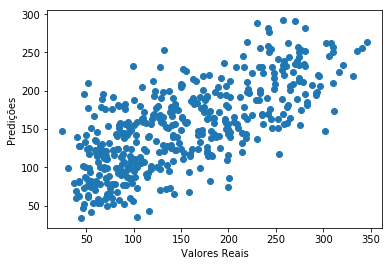

In [29]:
#make cross validated predictions
predictions2 = cross_val_predict(model, df, Y, cv=200)
plt.scatter(Y, predictions2)
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [30]:
accuracy2 = metrics.r2_score(Y, predictions2)
print ("Cross-Predicted n-fold R^2:", accuracy2)

Cross-Predicted n-fold R^2: 0.493424990339


# Stratified K-Fold 

In [ ]:
dobras estratificadas = cria dobras preservando a mesma porcentagem para cada classe-alvo como no conjunto completo.

In [33]:
#Example of stratified 3-fold cross-validation on a dataset with 10 samples from two slightly unbalanced classes
X1 = [[0., 0.],
     [1., 1.],
     [-1., -1.],
     [2., 2.],
     [3., 3.],
     [4., 4.],
     [0., 1.],
     [3., 3.],
     [4., 4.],
     [0., 1.]]
Y1 = [0, 0, 0, 1, 1, 1, 0,1,1,0]

skf = StratifiedKFold(Y1, 3)
print(skf)

sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 1 1 1 0 1 1 0], n_folds=3, shuffle=False, random_state=None)


In [34]:
for train, test in skf:
        print(train, test)

[2 5 6 7 8 9] [0 1 3 4]
[0 1 3 4 8 9] [2 5 6 7]
[0 1 2 3 4 5 6 7] [8 9]


# Leave P Out (LPO)

In [36]:
#Example of Leave-2-Out on a dataset with 4 samples:
X1 = np.ones(5)
lpo = LeavePOut(p=2)

# número de subconjuntos n!/(p!(n-p)!)

for train, test in lpo.split(X1):
    print("%s %s" % (train, test))

[2 3 4] [0 1]
[1 3 4] [0 2]
[1 2 4] [0 3]
[1 2 3] [0 4]
[0 3 4] [1 2]
[0 2 4] [1 3]
[0 2 3] [1 4]
[0 1 4] [2 3]
[0 1 3] [2 4]
[0 1 2] [3 4]


# Leave One Label Out (LOLO)

In [39]:
X1 = [[0., 0.], [1., 1.], [-1., -1.], [2., 2.], [1., 1.], [-1., -1.], [2., 2.]]
Y1 = [0, 1, 0, 1, 1, 1, 0]
labels = [1, 1, 2, 2, 3, 3, 3]

lolo = LeaveOneLabelOut(labels)
print(lolo)

for train, test in lolo:
    print(train, test)

sklearn.cross_validation.LeaveOneLabelOut(labels=[1 1 2 2 3 3 3])
[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3] [4 5 6]


# Leave P Label Out (LPLO)

In [41]:
X1 = [[0., 0.], [1., 1.], [-1., -1.], [2., 2.], [3., 3.], [4., 4.]]
Y1 = [0, 1, 0, 1, 0, 1]
labels = [1, 1, 2, 2, 3, 3]
lplo = LeavePLabelOut(labels, 2)
print(lplo)

for train, test in lplo:
    print(train, test)

sklearn.cross_validation.LeavePLabelOut(labels=[1 1 2 2 3 3], p=2)
[4 5] [0 1 2 3]
[2 3] [0 1 4 5]
[0 1] [2 3 4 5]


# ShuffleSplit

In [ ]:
boa alternativa para a validação cruzada K-Fold 
pois permite um controle mais preciso sobre o número de iterações 
e a proporção de amostras em cada lado da divisão do train/teste.

In [42]:
X1 = np.arange(5)
ss = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X1):
    print("%s %s" % (train_index, test_index))

[1 3 4] [2 0]
[1 4 3] [0 2]
[4 0 2] [1 3]


# learning curve

In [43]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
        
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

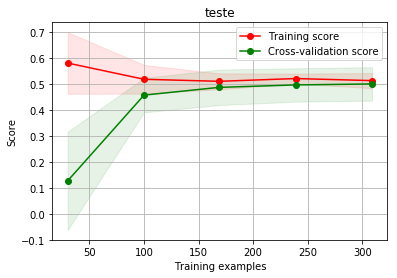

In [44]:
# plotando a curva de aprendizado usando o metodo de validação cruzada ShuffleSplit
ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
lm = linear_model.LinearRegression()
plot_learning_curve(lm, 'teste', df, Y, cv=ss, n_jobs=4)
plt.show()

# grid search cross-validation

In [51]:
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [53]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [54]:
clf.best_score_

0.97999999999999998